In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Using TensorFlow backend.


In [3]:
train_data = pd.read_csv("fashionmnist/fashion-mnist_train.csv")
test_data = pd.read_csv("fashionmnist/fashion-mnist_test.csv")

In [6]:
#lets check the shape of these two datasets
print("train - rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("test - rows:",test_data.shape[0]," columns:", test_data.shape[1])

train - rows: 60000  columns: 785
test - rows: 10000  columns: 785


In [7]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [9]:
#get distribution of classes
def get_classes_distribution(data):
    #total count for each label
    label_counts = data["label"].value_counts()
    
    #total number of sample
    total_samples = len(data)

    # count number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:  {} or {}%".format(label, count, percent))

In [10]:
get_classes_distribution(train_data)

Ankle Boot          :  6000 or 10.0%
Bag                 :  6000 or 10.0%
Sneaker             :  6000 or 10.0%
Shirt               :  6000 or 10.0%
Sandal              :  6000 or 10.0%
Coat                :  6000 or 10.0%
Dress               :  6000 or 10.0%
Pullover            :  6000 or 10.0%
Trouser             :  6000 or 10.0%
T-shirt/top         :  6000 or 10.0%


The classes are evenly distributed at 10% across the board.

Lets see what the test data says

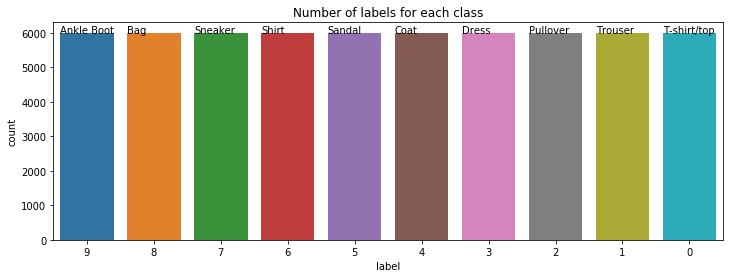

In [12]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")
    
    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()

plot_label_per_class(train_data)

In [13]:
get_classes_distribution(test_data)

Sneaker             :  1000 or 10.0%
Shirt               :  1000 or 10.0%
Sandal              :  1000 or 10.0%
Coat                :  1000 or 10.0%
Dress               :  1000 or 10.0%
Pullover            :  1000 or 10.0%
Ankle Boot          :  1000 or 10.0%
Trouser             :  1000 or 10.0%
Bag                 :  1000 or 10.0%
T-shirt/top         :  1000 or 10.0%


Same scenario as the train data

Lets have a look at the images

In [15]:
img_rows = 28
img_cols = 28

def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(img_rows,img_cols)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


In [16]:
# Plot the images

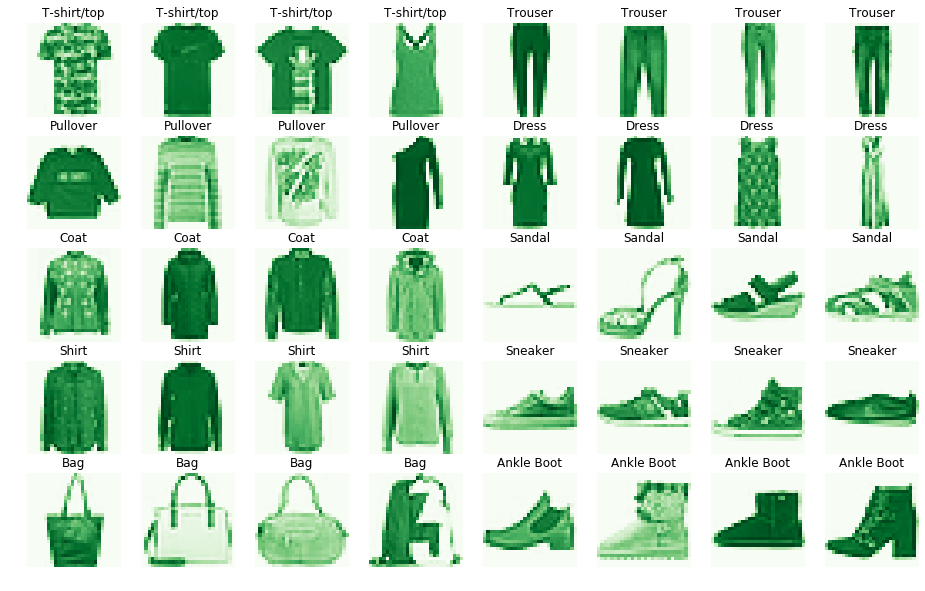

In [17]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

Same for the test data

Total number of sample images to plot:  40


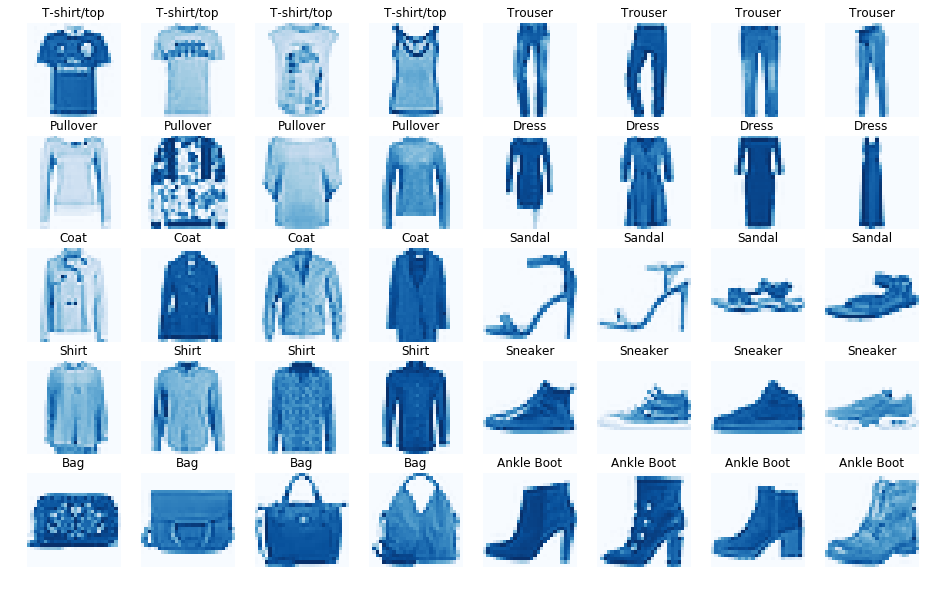

In [18]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

## Model Data

Lets first preprocess our data so we can begin modelling it. I will change the columns from 784 to 28,28,1. 

In [21]:
num_classes = 10
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [22]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

## Split and Train

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2018)

In [24]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


We have gotten our 28,28,1 matrix to proceed further

In [30]:
# Model
model = Sequential()
# add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,
                kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [32]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 36s 744us/sample - loss: 0.5514 - acc: 0.7986 - val_loss: 0.3760 - val_acc: 0.8637
Epoch 2/50
48000/48000 [==============================] - 46s 954us/sample - loss: 0.3464 - acc: 0.8752 - val_loss: 0.3340 - val_acc: 0.8791
Epoch 3/50
48000/48000 [==============================] - 40s 831us/sample - loss: 0.2957 - acc: 0.8914 - val_loss: 0.2908 - val_acc: 0.8980
Epoch 4/50
48000/48000 [==============================] - 41s 846us/sample - loss: 0.2595 - acc: 0.9056 - val_loss: 0.2728 - val_acc: 0.9012
Epoch 5/50
48000/48000 [==============================] - 30s 634us/sample - loss: 0.2339 - acc: 0.9145 - val_loss: 0.3077 - val_acc: 0.8923
Epoch 6/50
48000/48000 [==============================] - 27s 557us/sample - loss: 0.2119 - acc: 0.9215 - val_loss: 0.2656 - val_acc: 0.9039
Epoch 7/50
48000/48000 [==============================] - 31s 636us/sample - loss: 0.1908 - acc: 0.9300 

In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6262801875371486
Test accuracy: 0.9142


In [34]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



The validation accuracy starts to decrease quite early in the epoch cycle and hence shows that there is overfitting in our model. We can improve this model by adding a few dropout layers which helps prevent overfitting.

In [37]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [40]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 795us/sample - loss: 0.7417 - acc: 0.7234 - val_loss: 0.4545 - val_acc: 0.8335
Epoch 2/50
48000/48000 [==============================] - 48s 1ms/sample - loss: 0.4748 - acc: 0.8260 - val_loss: 0.3747 - val_acc: 0.8658
Epoch 3/50
48000/48000 [==============================] - 33s 695us/sample - loss: 0.4057 - acc: 0.8518 - val_loss: 0.3279 - val_acc: 0.8808
Epoch 4/50
48000/48000 [==============================] - 32s 664us/sample - loss: 0.3701 - acc: 0.8652 - val_loss: 0.3070 - val_acc: 0.8895
Epoch 5/50
48000/48000 [==============================] - 31s 651us/sample - loss: 0.3449 - acc: 0.8742 - val_loss: 0.2951 - val_acc: 0.8920
Epoch 6/50
48000/48000 [==============================] - 41s 848us/sample - loss: 0.3273 - acc: 0.8806 - val_loss: 0.2808 - val_acc: 0.8975
Epoch 7/50
48000/48000 [==============================] - 34s 701us/sample - loss: 0.3124 - acc: 0.8850 - 

In [41]:
plot_accuracy_and_loss(train_model)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



The validation loss is at a much better standing now, we can move forward with the testing data.

In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2070095078483224
Test accuracy: 0.9262


The test accuracy is also satisfactory, sitting at 93% when rounded up. 

In [43]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

In [44]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [45]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9262
Incorrect predicted classes: 738


In [47]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.89      0.86      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.92      0.84      0.88      1000
      Class 3 (Dress) :       0.94      0.94      0.94      1000
       Class 4 (Coat) :       0.87      0.91      0.89      1000
     Class 5 (Sandal) :       0.99      0.97      0.98      1000
      Class 6 (Shirt) :       0.77      0.82      0.80      1000
    Class 7 (Sneaker) :       0.94      0.98      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.98      0.97      0.97      1000

              micro avg       0.93      0.93      0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



Lets have a look at the correctly classified images

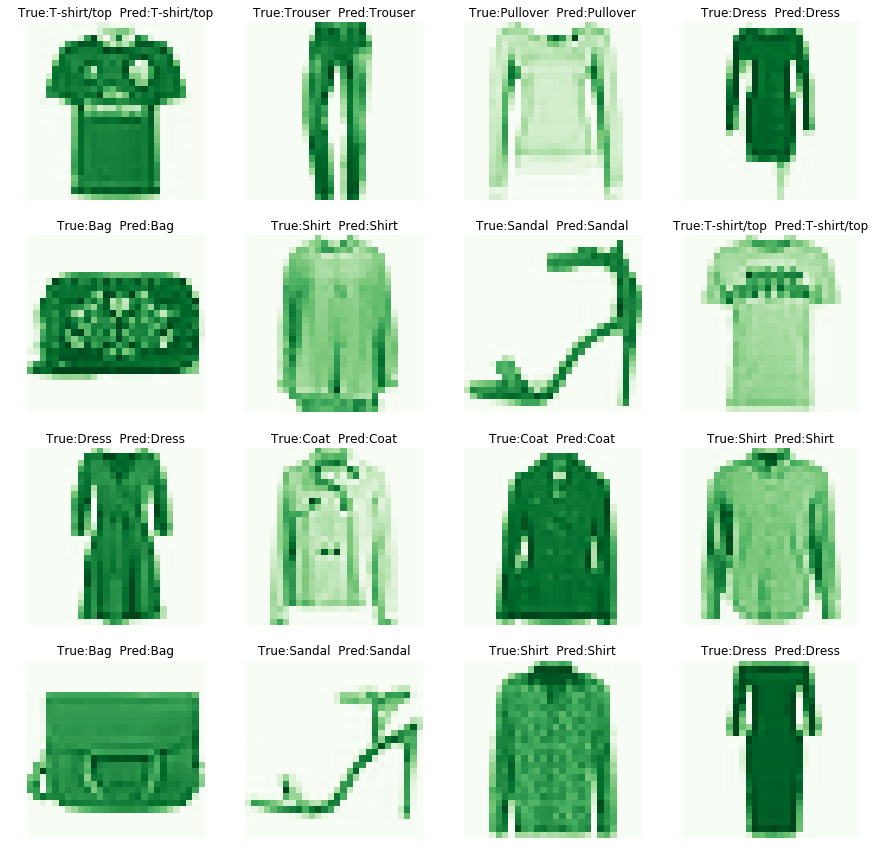

In [49]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(img_rows,img_cols), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

Lets have a look at the incorrect work

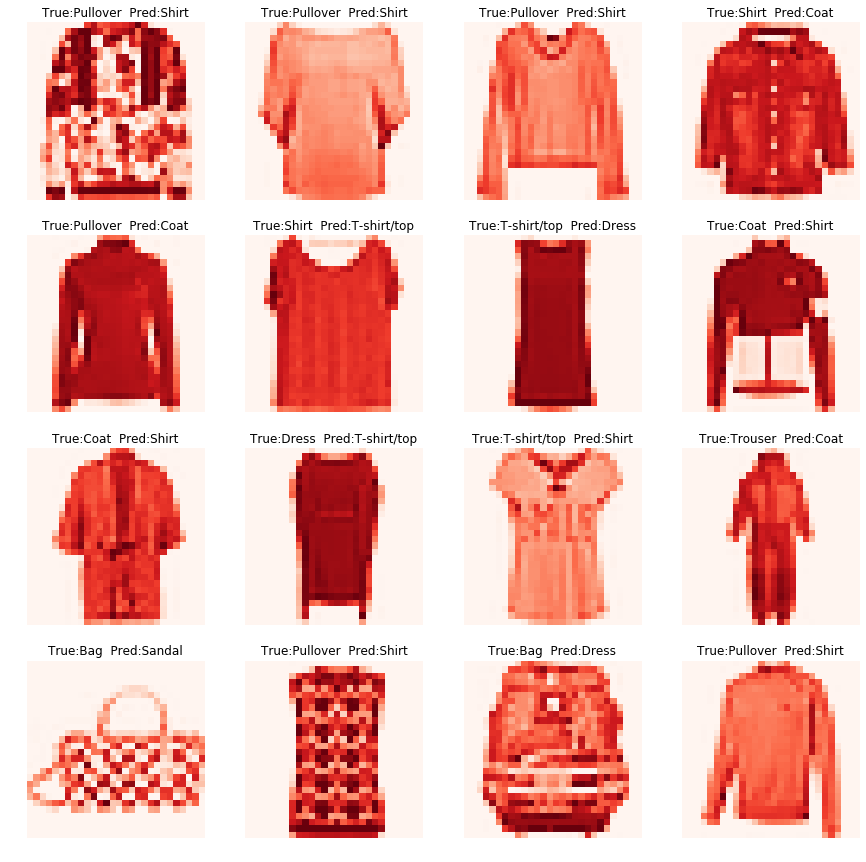

In [50]:
plot_images(incorrect, "Reds")

## Final Thoughts

The first attempt in the sequential model with multiple convolution layers  and 50 epochs for the training, we got 91% accuracy for the test prediction, however after having a look at the validation accuracy and loss it was determined that there was overfitting in the model. 
To counter this, we added Dropout layers to the model to reduce the overfitting, the results were significantly improved with 93% accuracy for test prediction and better validation.